# CFHTLS LRG selection

We need a sample of LRGs from CFHTLS that span the range of redshifts and i-band magnitudes found in the OM10 catalog. The sample can be kept small by selecting in color as well as magnitude and redshift. 

In [3]:
%matplotlib inline
import om10,os
import numpy as np
import matplotlib.pyplot as plt

First, we need to download a new CFHTLS_LRGs.txt catalog. Let's do this in pieces, to avoid being overloaded with useless blue galaxies. First we put all the downloading code in a `def`, and then run it multipl times with hand-crafted redshift ranges:

In [18]:
def download_CFHTLS_galaxy_catalog(N,z,imag):
    # Sensible filename:
    output = "CFHTLS_galaxies_2015-07-13_{:.1f}-z-{:.1f}.txt".format(z[0],z[1]) 
    # Assemble the URL:
    url = "http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/community/CFHTLens/cgi/queryt.pl?"
    url = url+"REQUEST=doQuery&LANG=ADQL&method=sync&format=ascii&query=SELECT%0D%0Atop+"+str(N)
    url = url+"%0D%0AALPHA_J2000%2C+DELTA_J2000%2C+FLUX_RADIUS%2C+CLASS_STAR%2C+fitclass%2C+Z_B%2C+Z_B_MIN%2C+Z_B_MAX%2C+T_B%2C+star_flag%2C+MAG_u%2C+MAG_g%2C+MAG_r%2C+MAG_i%2C+MAG_y%2C+MAG_z%0D%0A"
    url = url+"FROM%0D%0Acfht.clens%0D%0AWHERE%0D%0Afitclass%3E%3D0%0D%0AAND+fitclass%3C%3D0%0D%0AAND+star_flag%3C%3D0.1%0D%0A"
    url = url+"AND+MAG_i%3E%3D"+str(imag[0])+"%0D%0AAND+MAG_i%3C%3D"+str(imag[1])+"%0D%0A"
    url = url+"AND+Z_B%3E%3D"+str(z[0])+"%0D%0AAND+Z_B%3C%3D"+str(z[1])+"%0D%0A"
    # Download the data with wget:
    !wget -q -O "$output" "$url"
    # Comment out the first line:
    !sed s/'ALPHA'/'# ALPHA'/g "$output" > junk
    !mv junk "$output"
    # Check file for download errors (this happens a lot):
    if 'Error' in open(output).read():
        print "Error downloading data, removing file "+output
        !rm $output
        return None
    else:
        return output

def concatenate_CFHTLS_galaxy_catalogs(filenames):
    input = ' '.join(filenames)
    output = "CFHTLS_galaxies_2015-07-13.txt"
    !cat $input > $output
    !wc -l $output
    return output

In [50]:
N = 10000
filenames = ['a','b','c','d','e','f']
filenames[0] = download_CFHTLS_galaxy_catalog(N,[0.0,0.5],[14.0,22.0])
filenames[1] = download_CFHTLS_galaxy_catalog(N,[0.5,1.0],[19.0,23.5])
filenames[2] = download_CFHTLS_galaxy_catalog(N,[1.0,1.5],[20.5,24.5])
filenames[3] = download_CFHTLS_galaxy_catalog(N,[1.5,2.0],[21.5,25.0])
filenames[4] = download_CFHTLS_galaxy_catalog(N,[2.0,2.5],[22.5,25.5])
filenames[5] = download_CFHTLS_galaxy_catalog(N,[2.5,3.0],[23.5,25.5])
print filenames

Error downloading data, removing file CFHTLS_galaxies_2015-07-13_0.0-z-0.5.txt
Error downloading data, removing file CFHTLS_galaxies_2015-07-13_2.5-z-3.0.txt
[None, 'CFHTLS_galaxies_2015-07-13_0.5-z-1.0.txt', 'CFHTLS_galaxies_2015-07-13_1.0-z-1.5.txt', 'CFHTLS_galaxies_2015-07-13_1.5-z-2.0.txt', 'CFHTLS_galaxies_2015-07-13_2.0-z-2.5.txt', None]


In [51]:
galaxyfile = concatenate_CFHTLS_galaxy_catalogs([f for f in filenames if f is not None])

   40004 CFHTLS_galaxies_2015-07-13.txt


Now, let's plot this new CFHTLS catalog, and overlay the OM10 lens galaxies.

In [52]:
db = om10.DB(catalog=os.path.expandvars("$OM10_DIR/data/qso_mock.fits"))
data = np.loadtxt("CFHTLS_galaxies_2015-07-13.txt")

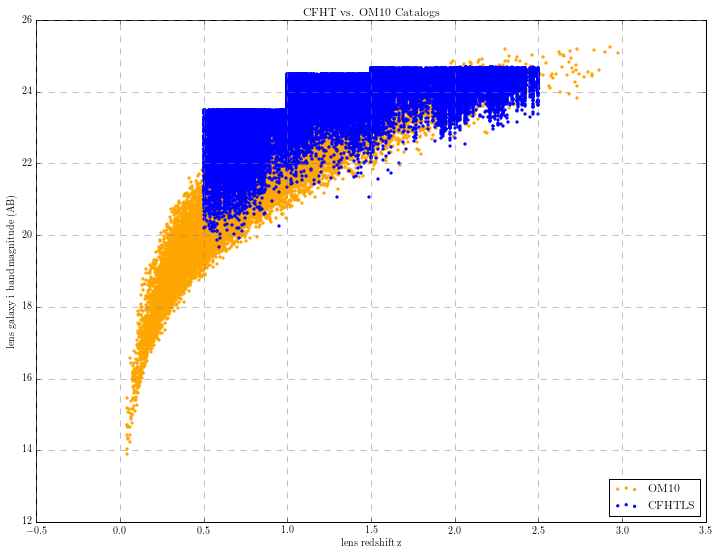

In [53]:
fig = plt.figure()
fig.set_size_inches(12,9)
plt.scatter(db.lenses['ZLENS'],db.lenses['APMAG_I'],color='Orange',marker='.',label='OM10',alpha=1)
plt.scatter(data[:,5],data[:,13],color='Blue',marker='.',label='CFHTLS',alpha=1)
plt.title('CFHT vs. OM10 Catalogs')
plt.xlabel('lens redshift z')
plt.ylabel('lens galaxy i band magnitude (AB)')
plt.legend(loc=4)
plt.grid(color='grey', linestyle='--', linewidth=0.5)

This is an attempt at a more restrictive initial selection, to efficiently focus on the brightest galaxies at each redshift bin. The next thing is to try and focus the sample even more, on the red sequence.

(-1, 3)

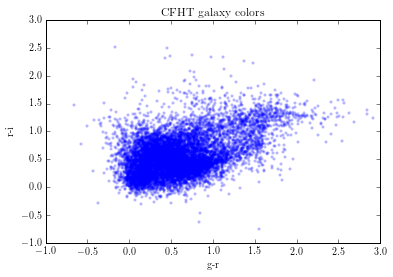

In [38]:
index = range(len(data[:,0]))
# z = data[:,5]
# index = np.where((z>0.3)*(z<0.6))

gr = data[index,11] - data[index,12]
ri = data[index,12] - data[index,13]
i = data[index,13]
plt.figure()
plt.scatter(gr,ri,color='Blue',marker='.',label='CFHTLS',alpha=0.2)
plt.title('CFHT galaxy colors')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.gca().set_xlim([-1,3])
plt.gca().set_ylim([-1,3])

In [ ]:
index = np.where(data[:,13])

In [ ]:
plt.figure()
plt.scatter(db.lenses['ZLENS'],db.lenses['APMAG_I'],color='Orange',marker='.',label='OM10')
plt.scatter(data[index,5],data[index,13],color='Blue',marker='.',label='CFHTLS',alpha=0.2)
plt.title('CFHT vs. OM10 Catalogs')
plt.xlabel('lens redshift z')
plt.ylabel('lens galaxy i band magnitude (AB)')
plt.legend(loc=4)